In [1]:
import numpy as np
from matplotlib import pyplot as plt
import k_bandit
from k_bandit import Bandit
from importlib import reload
import matplotlib.ticker as mtick

# K-Bandit Problem
## Testing
* We will perform 2000 independent simmulations with 1000 steps each, 10 actions each. We will compute the average across all simulations for each step.
* We will test with several k-bandit strategies: greedy, e = 0.1, e = 0.01
* We will graph and compare the differnet k-bandit approaches to find the optimal one

In [3]:
reload(k_bandit)

<module 'k_bandit' from '/Users/arhtea/Documents/Reinforcement-Learning/k_bandit/k_bandit.py'>

In [4]:
# Greedy
rewards_greedy = []
actions_greedy = []
for sim in range(2000):
    bandit = Bandit()
    bandit.simulation(n=1000, exploration_prob=0)
    rewards_greedy.append(bandit.get_rewards())
    actions_greedy.append(bandit.get_actions())
rewards_greedy = np.mean(rewards_greedy, axis=0)
actions_greedy = np.mean(actions_greedy, axis=0)

In [2]:
# e = 0.1
rewards_explore1 = []
actions_explore1 = []
for sim in range(2000):
    bandit = Bandit()
    bandit.simulation(n=1000, exploration_prob=0.1)
    rewards_explore1.append(bandit.get_rewards())
    actions_explore1.append(bandit.get_actions())
rewards_explore1 = np.mean(rewards_explore1, axis=0)
actions_explore1 = np.mean(actions_explore1, axis=0)

In [6]:
print("Acual action values:", bandit.k_means)
print("Predicted action values:", bandit.k_rewards)
print("Difference:", np.array(bandit.k_means) - np.array(bandit.k_rewards))

Acual action values: [1.033484593431588, -2.174173698489845, -1.1208525548998411, -0.5559983308547141, -0.29832016427658825, 2.0681117402040323, -2.786028991036423, 1.8873854994177837, -0.11075372589773114, 1.170744741167172]
Predicted action values: [1.7863432198114482e-07, 2.376726867089639e-06, 8.823271661273069e-07, 2.3817248423969443e-06, 2.7323841638505487e-06, 4.854573455383873e-06, 3.0120015347536048e-06, 1.7744805288503865e-07, 3.10400324509915e-06, 1.2107994321197342]
Difference: [ 1.03348441 -2.17417608 -1.12085344 -0.55600071 -0.2983229   2.06810689
 -2.786032    1.88738532 -0.11075683 -0.04005469]


In [6]:
# e = 0.01
rewards_explore2 = []
actions_explore2 = []
for sim in range(2000):
    bandit = Bandit()
    bandit.simulation(n=1000, exploration_prob=0.01)
    rewards_explore2.append(bandit.get_rewards())
    actions_explore2.append(bandit.get_actions())
rewards_explore2 = np.mean(rewards_explore2, axis=0)
actions_explore2 = np.mean(actions_explore2, axis=0)

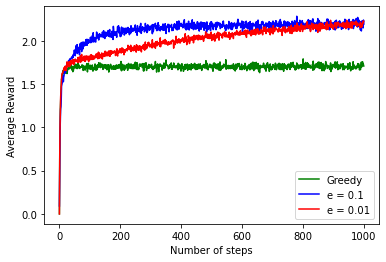

In [8]:
# Plot the experiments
# Rewards
plt.plot(np.arange(1000), rewards_greedy, color='g')
plt.plot(np.arange(1000), rewards_explore1, color='b')
plt.plot(np.arange(1000), rewards_explore2, color='r')
plt.xlabel('Number of steps')
plt.ylabel('Average Reward')
plt.legend(['Greedy', 'e = 0.1', 'e = 0.01'])
plt.show()

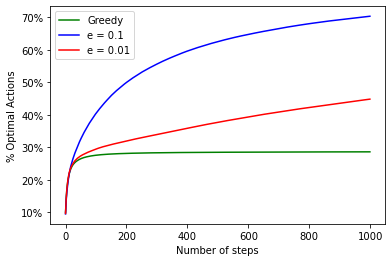

In [14]:
# Actions
plt.plot(np.arange(1000), actions_greedy, color='g')
plt.plot(np.arange(1000), actions_explore1, color='b')
plt.plot(np.arange(1000), actions_explore2, color='r')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.xlabel('Number of steps')
plt.ylabel('% Optimal Actions')
plt.legend(['Greedy', 'e = 0.1', 'e = 0.01'])
plt.show()